In [1]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self):
        #TODO
        return 0

    def rotate_left(self):
        #TODO
        return 0
                    
        
    

In [ ]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)

    def fix(self, node):
        #You may alter code in this method if you wish, it's merely a guide.
        if node.parent == None:
            node.make_black()
        while node != None and node.parent != None and node.parent.is_red(): 
            #TODO
        self.root.make_black()

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


Part 2: Making Binary Search Dynamic
Binary search of a sorted array takes logarithmic search time. However, if you notice closely, the insertion of new element takes linear time, By keeping several sorted arrays, you can improve the time for insertion. For instance, you can SEARCH and INSERT separately on a set of n values.

In [20]:
# Make function that makes randomly generated arrays
import math
import random

# Using the random create list function used in lectures/labs
def create_list_custom(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

# Making randomly generated arrays from the description
def rand_list(n):
    if n == 0: # Accounting for if n = 0 (meaning an empty list can be generated)
        return [[]]
    
    k = int(math.floor(math.log2(n)) + 1) # Length of binary string representing n
    array_list = []
    
    bin_string = (bin(n))[2:] # Removing the "0b" prefix of the binary string
    rev_bin_string = bin_string[::-1] # Reversing the binary string so I can index each digit correctly (least significant digits first)

    
    for j in range(k): # Iterating through the string to check each character
        if rev_bin_string[j] == '0':
            array_list.append([])
        else:
            length = math.pow(2, j) # Computes length of list using index in binary string
            array_list.append(sorted(create_list_custom(int(length), 100)))

    array_list = array_list[::-1]
    return array_list # Reversing array_list to ensure the subarray lengths match the binary representation of n

# Testing:
# rand_list(3)
# rand_list(0)
# rand_list(1)
# print(rand_list(15))
# print(rand_list(4))

[[61, 74, 75, 87], [], []]


Part 2.1: Implement the SEARCH, INSERT, and DELETE operations for binary search using the above description. For this, the code has not been provided. Feel free to go back to previous labs and use the Binary Search implementations discussed there, to build on.

In [24]:
# Part 2.1
# Implementing insert operation
import math

def bs_insert(array_list, element, index):
    
    basic_list = []
    new_array_list = []
    # Making a one-dimensional list with the elements in array_list
    for i in array_list:
        for j in i:
            basic_list.append(j)
    basic_list.insert(index, element) # Inserting the element based on index
    # The given index determines which subarray the new element will be placed in, 
    # but each subarray will be sorted later so this may affect the element's overall position

    # To make my new list, I'm going to modify the rand_list function I made previously    
    new_length = len(basic_list) # This is the new n value
    k = math.floor(math.log2(new_length)) + 1
    bin_string = (bin(new_length))[2:]
    
    for j in range(k): # Iterating through the string to check each character
        if bin_string[j] == '0':
            new_array_list.append([])
        else:
            subarray_length = int(math.pow(2, j)) # Computes length of subarray using index in binary string
            new_array_list.append(basic_list[:subarray_length]) # slicing the one-dimensional list to get the desired elements
            basic_list = basic_list[subarray_length:] # slicing the one-dimensional list to remove the elements that were added to new_array_list

    for l in new_array_list: # Since this inserted element could be any value, I sort each subarray just as a precaution
        l.sort()

    # print("new array list: ", new_array_list)
    return new_array_list

# Testing
# x = rand_list(14)
# print(bs_insert(x, 7, 0))



# Implementing delete operation
# I can use the same logic as the bs_insert
def bs_delete(array_list, index): # Assuming that the function deletes a value from the array given a certain index
    

    basic_list = []
    new_array_list = []
    # Making a one-dimensional list with the elements in array_list
    for i in array_list:
        for j in i:
            basic_list.append(j)

    basic_list = basic_list[:index] + basic_list[index + 1:] 

    new_length = len(basic_list) # This is the new n value

    if new_length == 0: # Checks if the deletion removed all the values
        return [[]] 
    
    k = math.floor(math.log2(new_length)) + 1
    bin_string = (bin(new_length))[2:]

    rev_bin_string = bin_string[::-1]

    for j in range(k): # Iterating through the string to check each character
        if rev_bin_string[j] == '0':
            new_array_list.append([])
        else:
            subarray_length = int(math.pow(2, j)) # Computes length of subarray using index in binary string
            new_array_list.append(basic_list[:subarray_length]) # slicing the one-dimensional list to get the desired elements
            basic_list = basic_list[subarray_length:] # slicing the one-dimensional list to remove the elements that were added to new_array_list

    for l in new_array_list: # Since this inserted element could be any value, I sort each subarray just as a precaution
        l.sort()

    # print("new array list: ", new_array_list)
    return new_array_list


# Testing
# x = rand_list(14)
# print(bs_insert(x, 7, 0))
# x = rand_list(14)
# print(bs_delete(x, 7))

# Implementing binary search operation
def bs_search(array_list, key_value, current_index=0):
    # This function will go through each subarray and output the index of the given value using recursion
    working_copy = [[a for a in b] for b in array_list]
    # print(working_copy)

    if len(working_copy) == 0: # Last subarray in working_copy has been reached, and the item has not been found
        return -1

    # Go to first subarray and check its length 
    subarray_length = len(working_copy[0])
    current_subarray = working_copy[0]
    working_copy = working_copy[1:] # remove the first subarray 

    if subarray_length == 0: # Checking if current subarray is empty
        return bs_search(working_copy, key_value, current_index) # Use recursion to plug in the modified working array with the same index value (as there are no new elements)

    # Since each subarray is sorted, I can skip over the subarray by only checking if the first element in it is larger than the key value OR if the last element in it is less than the key value
    if (current_subarray[0] > key_value) or (current_subarray[-1] < key_value):
        return bs_search(working_copy, key_value, current_index + subarray_length) # Incrementing the current index by the length of the subarray (since all elements are skipped)
    else:
        # Now I can implement regular binary search (similar to the first implementation we did in lecture)
        lower = 0
        upper = subarray_length - 1
        while lower <= upper:
            mid = (lower+upper)//2
            if current_subarray[mid] == key_value:
                return current_index + mid # Returning the proper index if the key value is found
            if current_subarray[mid] < key_value:
                lower = mid+1
            else:
                upper=mid-1
        # This code section below only executes if the key value is not found while iterating through the subarray
        return bs_search(working_copy, key_value, current_index + subarray_length) # Recursive call that adds the length of this subarray to the current index

# Testing
# x = rand_list(4)
# y = bs_insert(x, 40, 3) # array, element, index
# bs_search(y, 40)



Part 2.2: In this section, you will compare your implementation against traditional implementations. Take ALL the Binary Search implementations we have discussed in the first few weeks and design an experiment to compare the performance against your dynamic implementation.

In your reflection section, describe in detail the experiment design, what are the various list sizes and the number of trials you chose? Also, describe your observations. Did you notice any performance improvement? When does dynamic binary search outperform others? When is it an overkill? Describe in detail your experiments design, and the observations. 

In [3]:
# Declaring experimental and plotting functions we've used in class

def create_list_custom(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list


import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

def draw_show_plot(run_arr, title):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize = (20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr), color = "red", linestyle="--", label = "Avg")
    plt.xlabel("Test #")
    plt.ylabel("Runtime")
    plt.title(title)
    plt.show()

In [14]:
# Defining the binary search implementations we've covered

# Implementations from the L02_Class_Notes lecture
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
            
    return item_list[lower]==to_find

def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1

    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:

        mid = (left+right)//2

        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

# Recursive binary search implementation from Lab 2

def binary_search_4(item_list, to_find, low=0, high=None):
    # Define the high boundary on the first call
    if high is None:
        high = len(item_list) - 1

    # Base case: if the low boundary exceeds the high, the item is not found
    if low > high:
        return False

    # Calculate the middle index
    mid = (low + high) // 2

    # Check if the middle element is the one we're looking for
    if item_list[mid] == to_find:
        return True
    # If the item we're looking for is greater, ignore the left half
    elif item_list[mid] < to_find:
        return binary_search_4(item_list, to_find, mid + 1, high)
    # If the item we're looking for is smaller, ignore the right half
    else:
        return binary_search_4(item_list, to_find, low, mid - 1)
    
# Possible cases I'm going to consider:
# - Target element is not located in the array
# - Target element is the last element in the array
# - Lists with multiple elements that are the same value
# These are typically the worst cases of any standard binary search algorithm


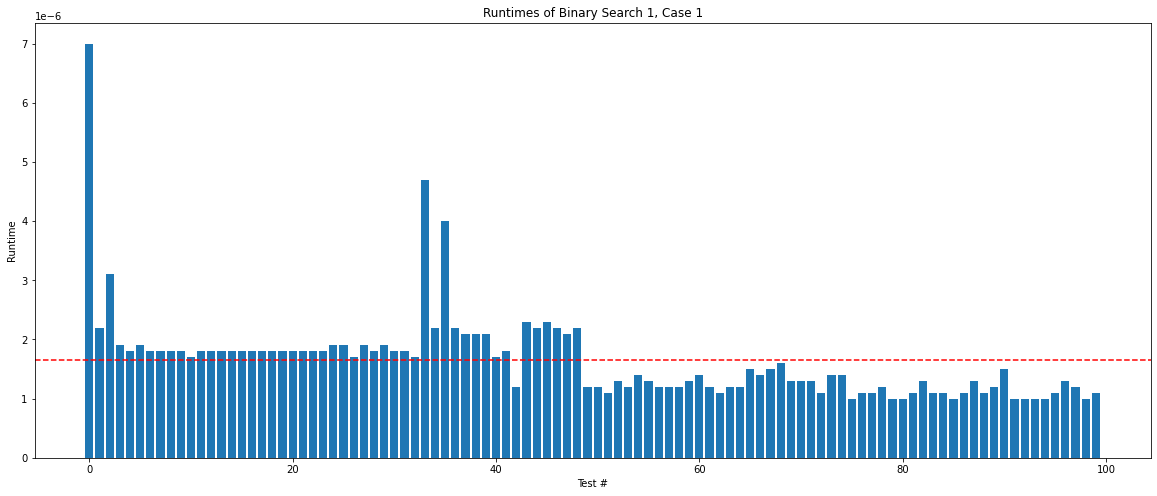

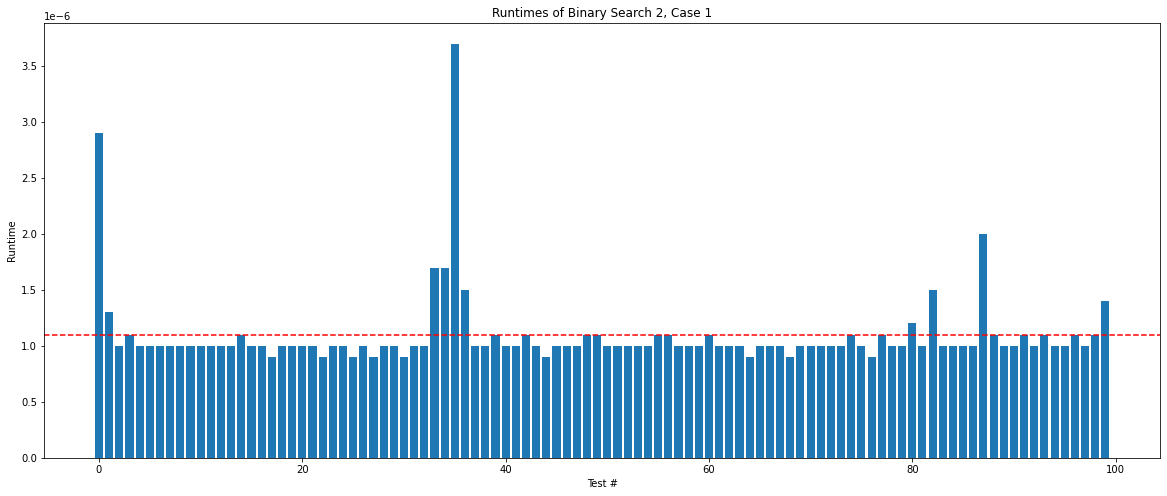

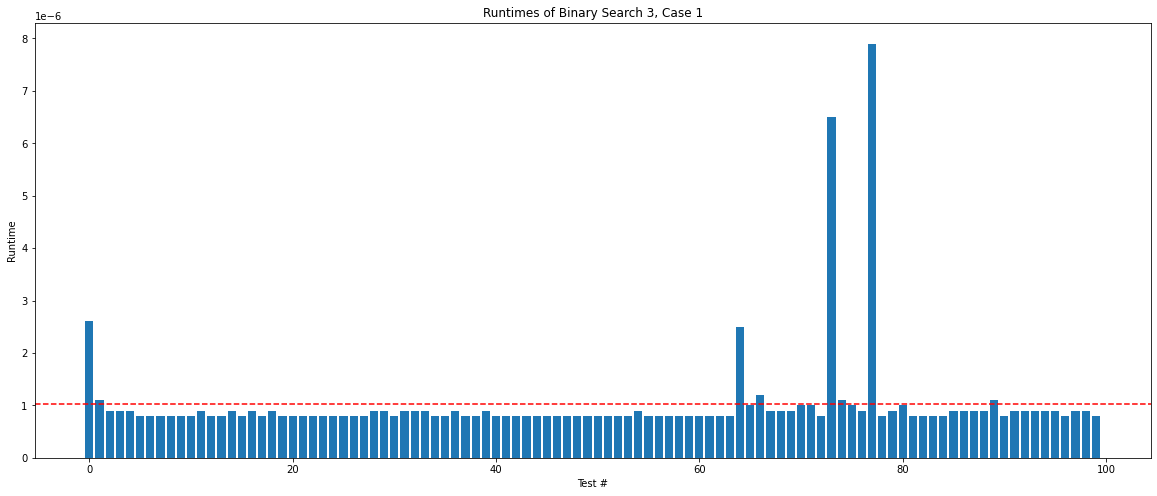

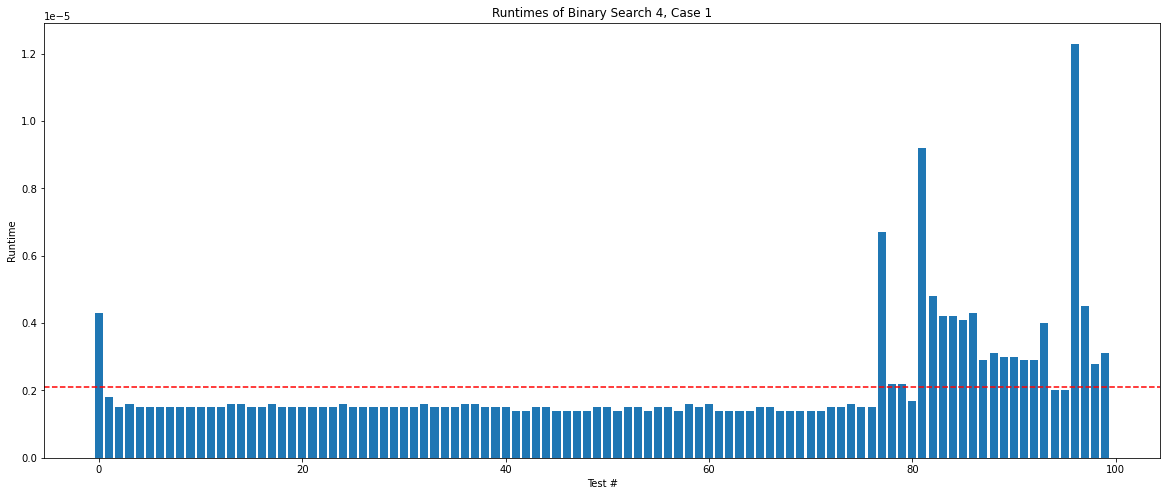

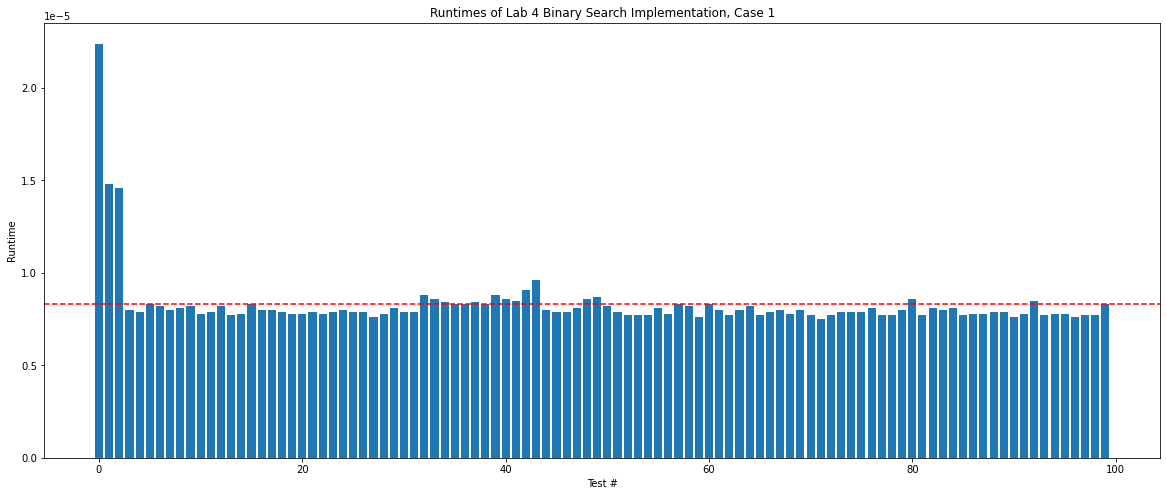

In [25]:
# Case 1: Target element is not located in the array
# Testing Case 1 with BS1
runs = 100

bs1_run_times = []

for _ in range(runs):
    
    my_list = sorted(create_list_custom(50, 100))
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_1(my_list,to_find)
    stop = timeit.default_timer()
    bs1_run_times.append(stop-start)

draw_show_plot(bs1_run_times, "Runtimes of Binary Search 1, Case 1")

# Testing Case 2 with BS2
bs2_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(50, 100))
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_2(my_list,to_find)
    stop = timeit.default_timer()
    bs2_run_times.append(stop-start)

draw_show_plot(bs2_run_times, "Runtimes of Binary Search 2, Case 1")

# Testing Case 1 with BS3
bs3_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(50, 100))
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_3(my_list,to_find)
    stop = timeit.default_timer()
    bs3_run_times.append(stop-start)

draw_show_plot(bs3_run_times, "Runtimes of Binary Search 3, Case 1")

# Testing Case 1 with BS4
bs4_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(50, 100))
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_4(my_list,to_find)
    stop = timeit.default_timer()
    bs4_run_times.append(stop-start)

draw_show_plot(bs4_run_times, "Runtimes of Binary Search 4, Case 1")

# Testing Case 1 with BS5 (the implementation made in this lab)
bs5_run_times = []
for _ in range(runs):
    
    my_list = rand_list(50)
    to_find= 101
    start = timeit.default_timer()
    found = bs_search(my_list, to_find)
    stop = timeit.default_timer()
    bs5_run_times.append(stop-start)

draw_show_plot(bs5_run_times, "Runtimes of Lab 4 Binary Search Implementation, Case 1")



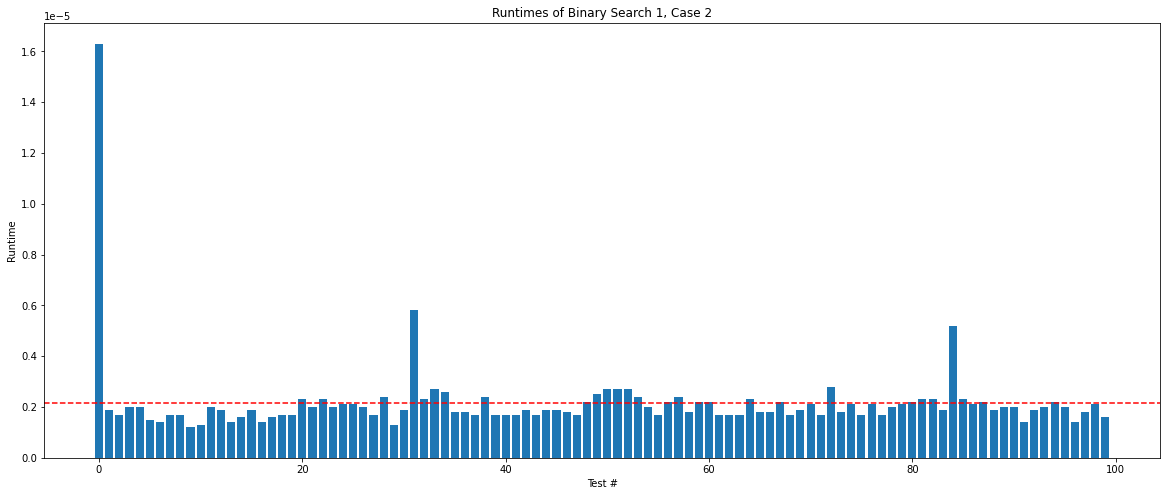

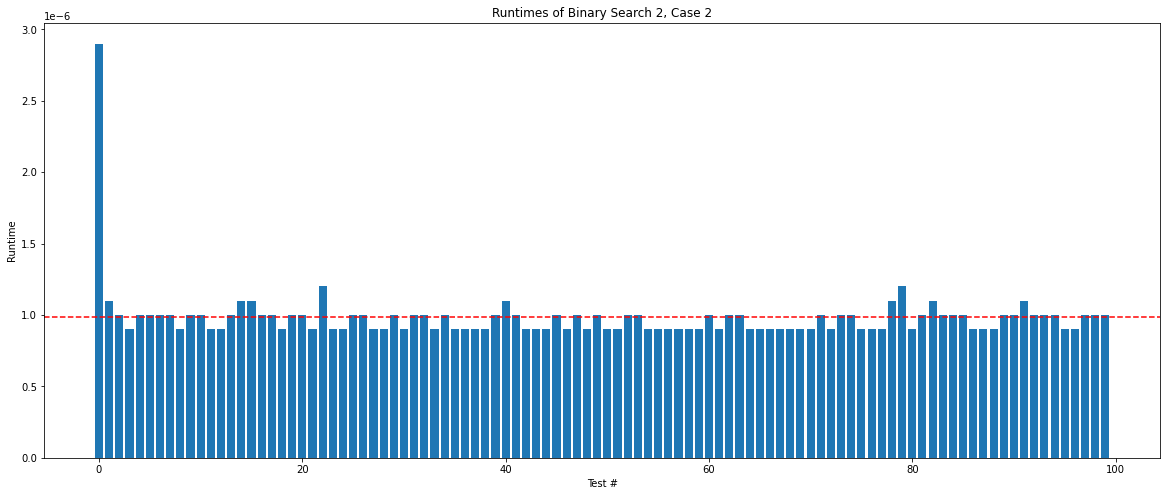

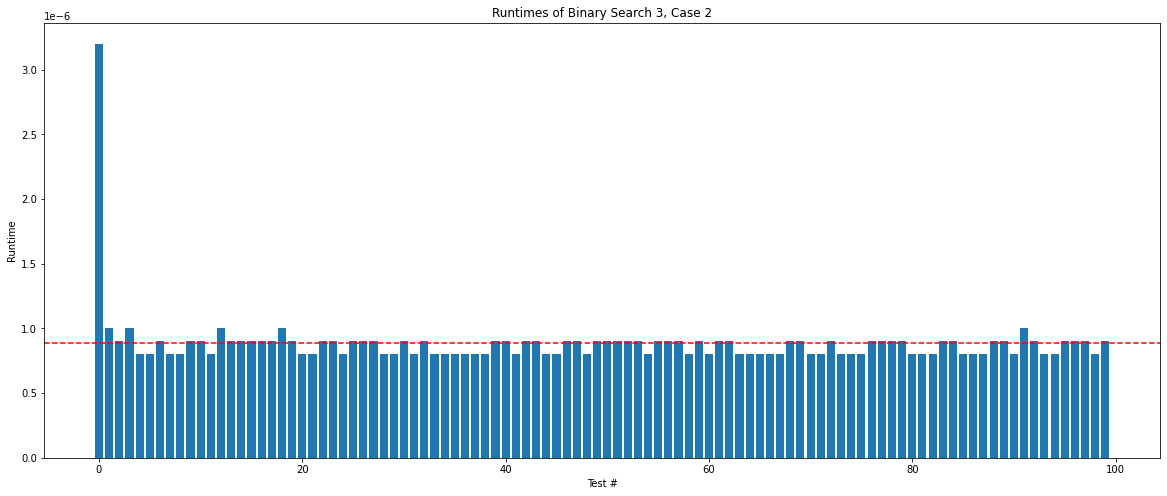

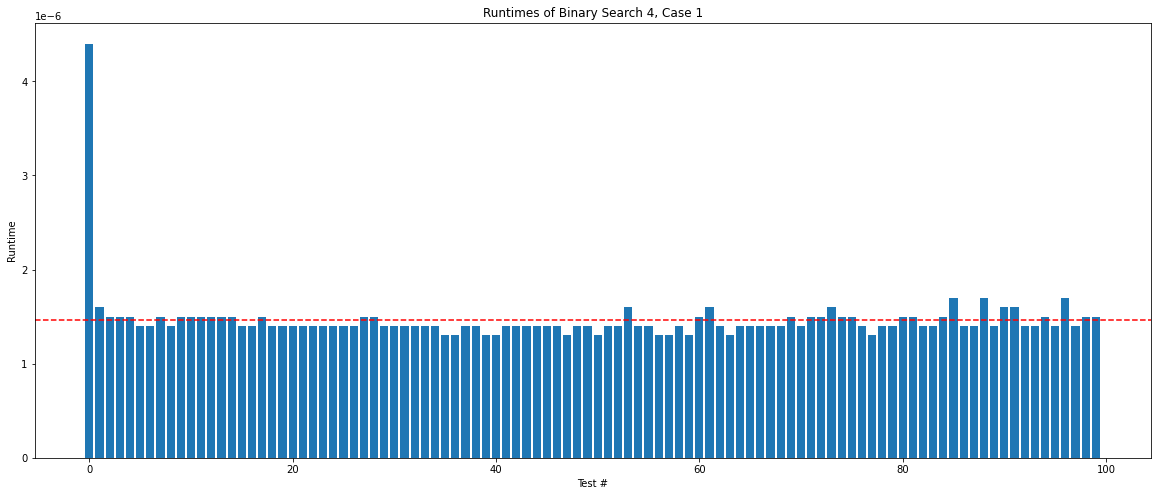

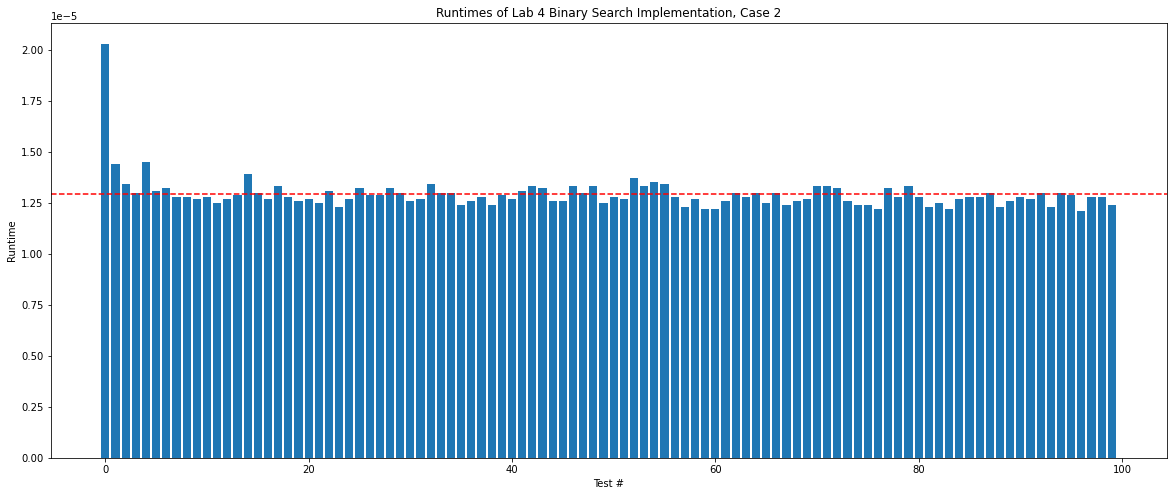

In [26]:
# Case 2: Target element is the last element in the array

# Testing Case 2 with BS1
runs = 100

bs1_run_times = []

for _ in range(runs):
    
    my_list = sorted(create_list_custom(49, 100))
    my_list.append(101)
    to_find = 101
    start = timeit.default_timer()
    found = binary_search_1(my_list,to_find)
    stop = timeit.default_timer()
    bs1_run_times.append(stop-start)

draw_show_plot(bs1_run_times, "Runtimes of Binary Search 1, Case 2")

# Testing Case 2 with BS2
bs2_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(49, 100))
    my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_2(my_list,to_find)
    stop = timeit.default_timer()
    bs2_run_times.append(stop-start)

draw_show_plot(bs2_run_times, "Runtimes of Binary Search 2, Case 2")

# Testing Case 2 with BS3
bs3_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(49, 100))
    my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_3(my_list,to_find)
    stop = timeit.default_timer()
    bs3_run_times.append(stop-start)

draw_show_plot(bs3_run_times, "Runtimes of Binary Search 3, Case 2")

# Testing Case 2 with BS4
bs4_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(49, 100))
    my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_4(my_list,to_find)
    stop = timeit.default_timer()
    bs4_run_times.append(stop-start)

draw_show_plot(bs4_run_times, "Runtimes of Binary Search 4, Case 1")

# Testing Case 2 with BS5 (the implementation made in this lab)
bs5_run_times = []
for _ in range(runs):
    
    my_list = bs_insert(rand_list(50), 101, -1)
    to_find= 101
    start = timeit.default_timer()
    found = bs_search(my_list, to_find)
    stop = timeit.default_timer()
    bs5_run_times.append(stop-start)

draw_show_plot(bs5_run_times, "Runtimes of Lab 4 Binary Search Implementation, Case 2")



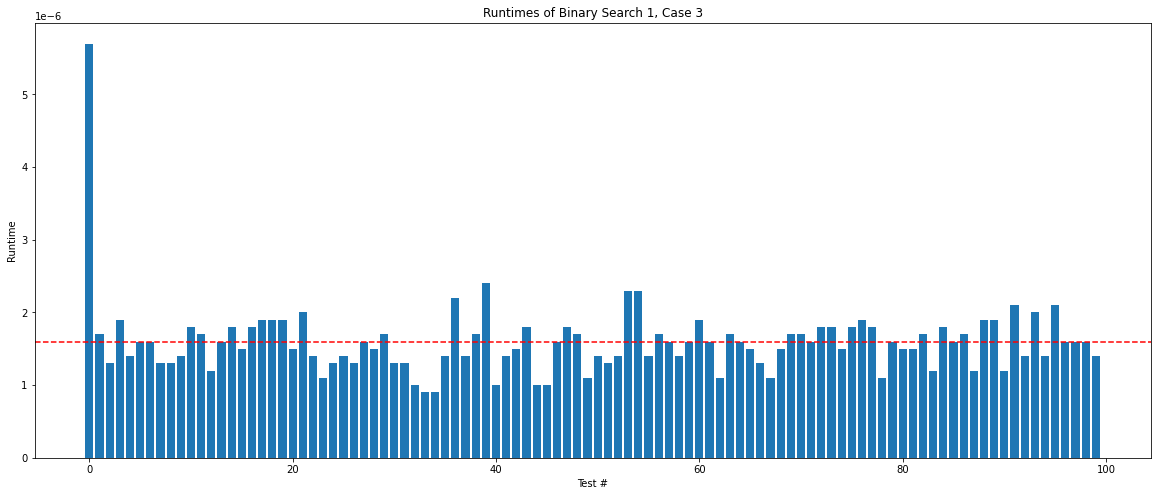

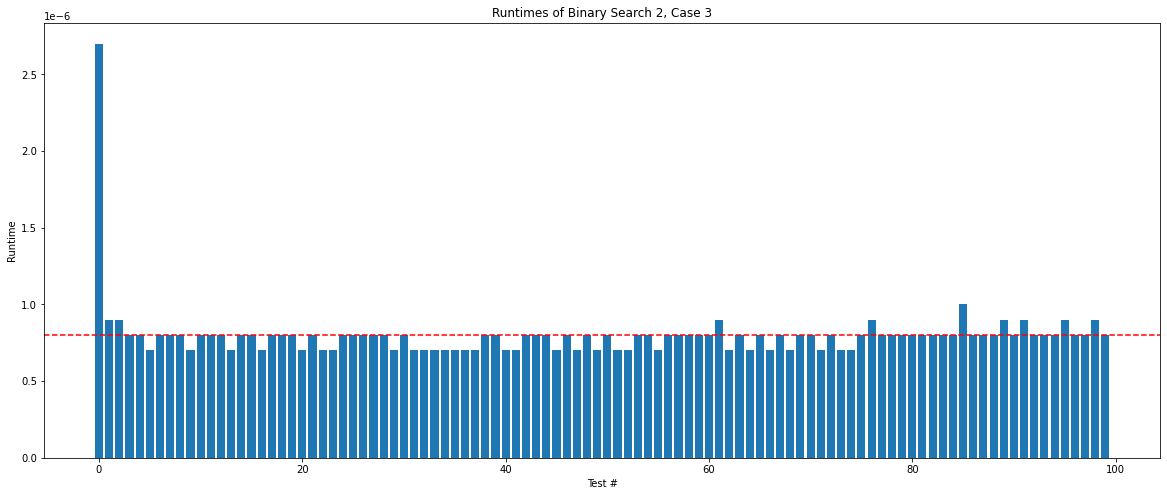

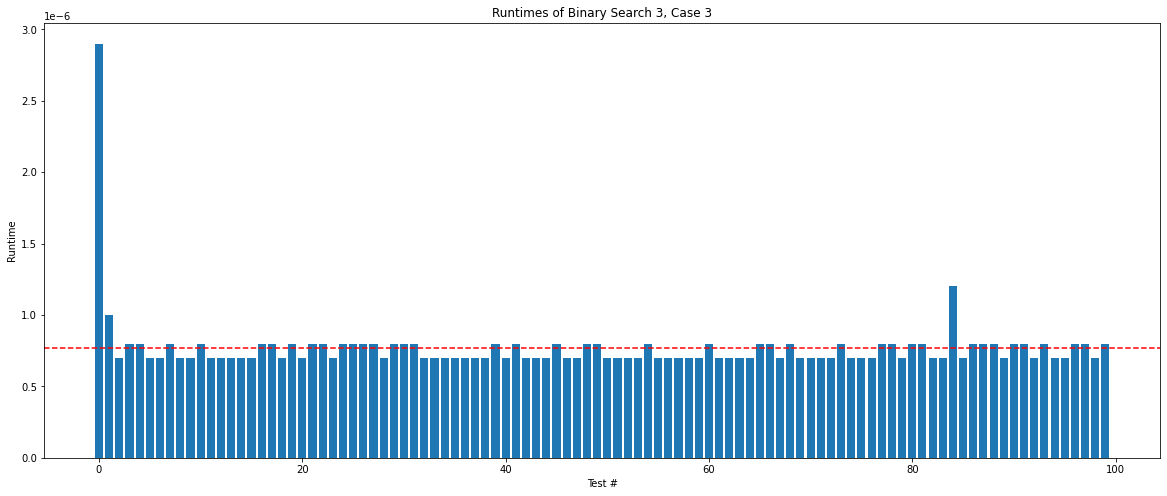

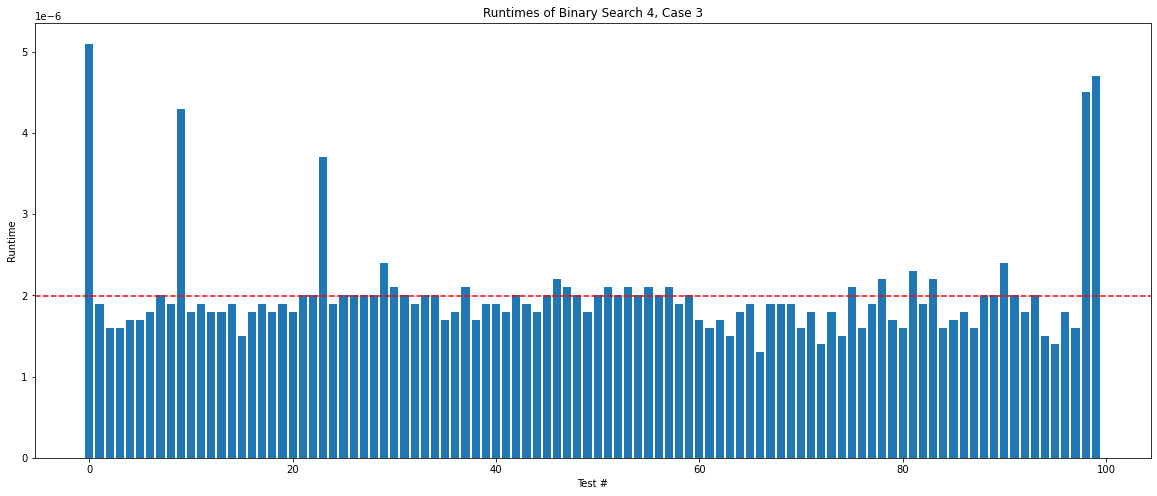

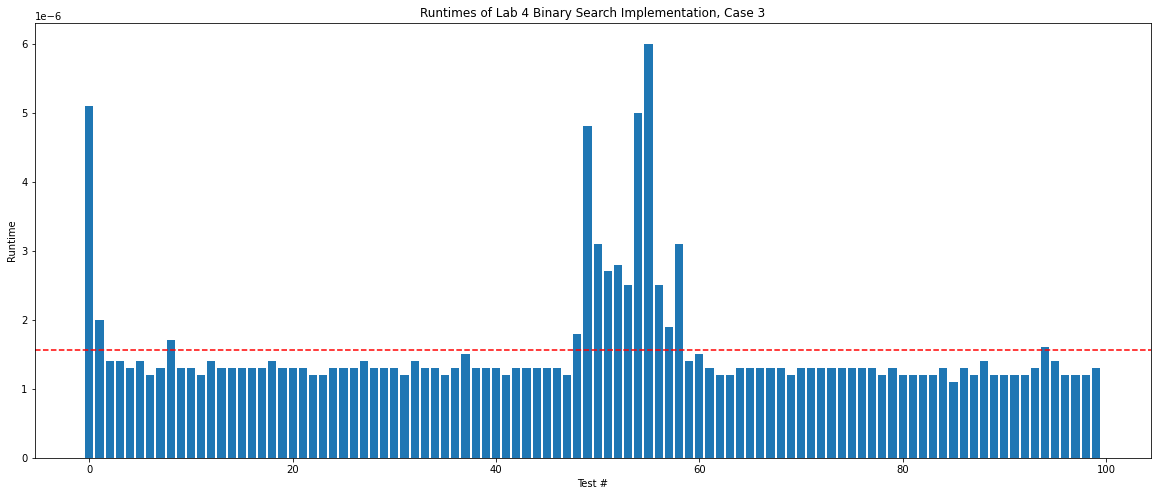

In [27]:
# Case 3: Lists with multiple elements that are the same value
# I'm going to have each tested array structured the same: 5 of the same elements at the end
# Testing Case 3 with BS1
runs = 100

bs1_run_times = []

for _ in range(runs):
    
    my_list = sorted(create_list_custom(45, 100))
    for i in range(5):
        my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_1(my_list,to_find)
    stop = timeit.default_timer()
    bs1_run_times.append(stop-start)

draw_show_plot(bs1_run_times, "Runtimes of Binary Search 1, Case 3")

# Testing Case 3 with BS2
bs2_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(45, 100))
    for i in range(5):
        my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_2(my_list,to_find)
    stop = timeit.default_timer()
    bs2_run_times.append(stop-start)

draw_show_plot(bs2_run_times, "Runtimes of Binary Search 2, Case 3")

# Testing Case 3 with BS3
bs3_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(45, 100))
    for i in range(5):
        my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_3(my_list,to_find)
    stop = timeit.default_timer()
    bs3_run_times.append(stop-start)

draw_show_plot(bs3_run_times, "Runtimes of Binary Search 3, Case 3")

# Testing Case 1 with BS4
bs4_run_times = []
for _ in range(runs):
    
    my_list = sorted(create_list_custom(45, 100))
    for i in range(5):
        my_list.append(101)
    to_find= 101
    start = timeit.default_timer()
    found = binary_search_4(my_list,to_find)
    stop = timeit.default_timer()
    bs4_run_times.append(stop-start)

draw_show_plot(bs4_run_times, "Runtimes of Binary Search 4, Case 3")

# Testing Case 3 with BS5 (the implementation made in this lab)
bs5_run_times = []
for _ in range(runs):
    
    # Building the array needed for this experiment
    first_insert = bs_insert(rand_list(45), 101, -1)
    second_insert = bs_insert(first_insert, 101, -1)
    third_insert = bs_insert(second_insert, 101, -1)
    fourth_insert = bs_insert(third_insert, 101, -1)
    my_list = bs_insert(fourth_insert, 101, -1)

    to_find= 101
    start = timeit.default_timer()
    found = bs_search(my_list, to_find)
    stop = timeit.default_timer()
    bs5_run_times.append(stop-start)

draw_show_plot(bs5_run_times, "Runtimes of Lab 4 Binary Search Implementation, Case 3")




**Reflection:**  

Outline of experiments:
- There are three main experiments for this section, all based on the typical worst runtime cases for binary search:
    - Binary search where the target element is not located in the array
    - Binary search where the target element is the last element of the array
    - Binary search where there are multiple elements of the same value
- For each case, the array is built and modified to ensure the constraints for each case are followed.
- I kept the array length and the range of values the same. Each array tested is 50 elements in length with a max value of 101.
    - The max value in arrays tested in the first case is 100. This is because the algorithm intentionally is trying to look for 101, which is not in the range of values in the generated array.
- Each experiment uses 100 trials.
- I used the three binary search implementations in class, the recursive binary search implementation covered in Lab 2, and the proposed 2D binary search implementation in this lab.
- Since there are 3 cases and 5 different binary search implementations, there are 3 x 5 = 15 experiments/plots.

Description of observations:  

Case 1: Binary search where the target element is not located in the array  

- There are 5 plots for this experiment.

- For BS 1, the plot seems pretty consistent for the first half of trials, then runtime decreases in the last half.
- BS 1 seems pretty uniform except for some significantly high runtimes in the first 40 trials.
- The first half of trials for BS 1 tend to stay above the average, and the last half tend to stay below the average.

- For BS 2, the results are pretty uniform with most trials staying at or below the average.
- Similar to BS 1's performance, There are a few outliers with high runtimes within the first 1-40 trials.

- For BS 3, performance is consistent with most trials below the runtime average.
- This plot had some individual high runtimes at the beginning and near the end.
- BS 3 has had the least runtime complexity so far.

- For BS 4, results were different as the last 25 trials seemed to be higher in runtime.
- The first ~75 trials are pretty uniform in performance. They are below the runtime average. 
- BS 4 has a significantly lower average runtime than the other three binary search algorithms so far. 

- BS 5 (the implemenation I made for this lab) performance for this case very uniform, with most trials at or below the average runtime.
- There are a few trials that are above the average at the beginning of the plot.
- In terms of average performance, BS 5 is second-most efficient. BS 4 is first.  

Case 2: Binary search where the target element is the last element in the array  

- There are 5 plots for this experiment.

- For BS 1, performance is not very uniform. There is a moderate amount of trials that are above or below the average.
- There is an exceptionally high runtime for the first trial.
- The average runtime for this experiment is significantly low.

- For BS 2, performance is very uniform.
- Similar to BS 1, there is a large runtime for the first trial.

- BS 3 performance looks extremely similar to BS 2 performance. The trials are uniform in runtime and there is one high runtime at the first trial.
- Average runtime for BS 3 is a little bit less than the runtime for BS 2.

- Average runtime for BS 4 is larger than both BS 2 and BS 3. Most trials stay at or below the plot's average.
- The first trial for the BS 4 plot is significantly higher than other first trials for algorithms in this case.

- For BS 5, the trials are not consistently below the average or above the average runtime.
- The first trial has a higher runtime than the other trials in its plot, but the difference in first trial runtime versus average runtime for this plot is much less than other plots in this case.
- BS 5 has the fourth-most fastest runtime of all algorithms tested in this case. BS 4 is fifth.  

Case 3: Binary search where there are multiple elements of the same value
- There are 5 plots for this experiment.

- For BS 1, runtime performance is not uniform at all.
- The runtime of the first trial is significantly higher than first trials of other experiments with this algorithm. 

- For BS 2, runtime performance is very uniform, with most trials at or below the runtime average.
- The first trial has a higher runtime than the other trials in the plot.
- Any runtimes that are above the average (and not the first trial) are within the last 15 trials. 

- For BS 3, performance is very similar to BS 2 in this experiment.
- There are more trials below the runtime average.
- The first few trials in this experiment are above the runtime average. 
- The runtime of the first trial is higher than the first trial runtime of the BS 2 algorithm experiment. 

- Performance is not consistent in BS 4. There are many trials with runtimes significantly above or below the average runtime.
- There are a few significantly high runtimes within the first 25 trials, and a few within the last 5 trials.
- The average runtime for BS 4 is the highest out of all averages in the experiment for this case.

- Performance is pretty consistent for BS 5. Most trial runtimes are below the average, except for a portion in the middle which are significantly high. 
- There are higher runtimes for the first few trials in this experiment.
- Compared to other binary search algorithms in this experiment, BS 5 is the third-most efficient in runtime. However, most average runtimes for this case were pretty similar. 

When does dynamic binary search outperform others?
- BS 5 tends to outperform in the first case: when the target element is not located in the array.
- While this algorithm did perform relatively well in the other cases, it seemed to be about the same in efficiency as the algorithms it was tested against.

When is dynamic binary search overkill?
- Looking at the results of BS 5's performance in each of the three cases, using dynamic binary search is definitely overkill when the target element is at the end of the array you're searching.
- Dynamic binary search also doesn't seem to have an advantage if there are multiple elements of the same value in the array you're searching.
- It seems that the best scenario to use a dynamic binary search algorithm is if you're unsure if the target element will even be in the array you're searching. 